In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

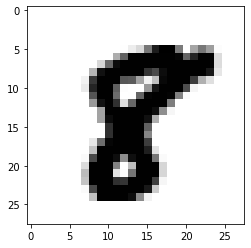

In [4]:
im = Image.open('mnist/mnist_train/1.png')
plt.imshow(im, cmap='binary')

In [13]:
import os
import torch
import pandas as pd

from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader

In [22]:
class ImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        df = pd.read_csv(csv_path)
        
        self.img_dir = img_dir
        self.img_names  = df['File Name']
        self.y = df['Class Label']
        self.transform = transform
        
    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_dir,
                                      self.img_names[index]))
        if self.transform is not None:
            img = self.transform(img)
            
        label = self.y[index]
        return img, label
    
    def __len__(self):
        return self.y.shape[0]

In [29]:
custom_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = ImageDataset(csv_path='mnist/mnist_train.csv',
                             img_dir='mnist/mnist_train',
                             transform=custom_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=32,
                          drop_last=True,
                          shuffle=True, # want to shuffle the dataset
                          num_workers=0) # number processes/CPUs to use

val_dataset = ImageDataset(csv_path='mnist/mnist_valid.csv',
                             img_dir='mnist/mnist_valid',
                             transform=custom_transform)

val_loader = DataLoader(dataset=val_dataset,
                          batch_size=100,
                          shuffle=False, # want to shuffle the dataset
                          num_workers=0) # number processes/CPUs to use

test_dataset = ImageDataset(csv_path='mnist/mnist_test.csv',
                             img_dir='mnist/mnist_test',
                             transform=custom_transform)

test_loader = DataLoader(dataset=test_dataset,
                          batch_size=100,
                          shuffle=False, # want to shuffle the dataset
                          num_workers=0) # number processes/CPUs to use

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)